In [28]:
!pip install google-search-results
import requests 
from serpapi import GoogleSearch 
!pip install opencv-python 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
cap= cv2.VideoCapture("DataExample.mp4")

In [31]:
count=0
frame_count=0
while True:
  ret,frame=cap.read()
  if not ret :
    break


  path=f"/content/photo_{frame_count}.png"
  cv2.imwrite(path,frame)


  frame_count+=1
  count+=1
    

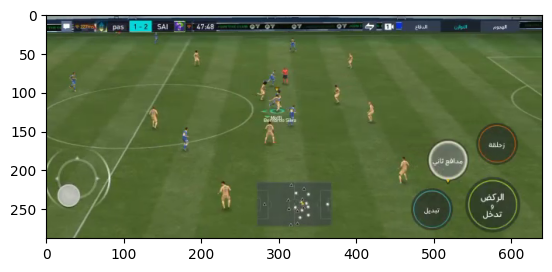

In [34]:
image1 = cv2.imread("photo_10.png")
image2= cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.show()
print("")

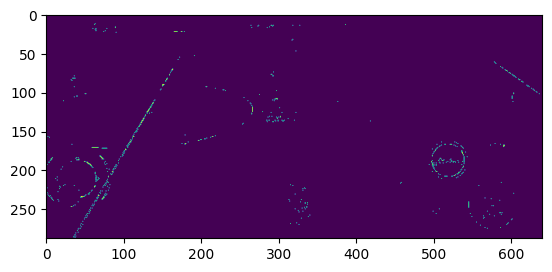

In [36]:

lower1 = 125,81,96
upper1 = 140,160,130
mask1 = cv2.inRange(image2,lower1,upper1)
plt.imshow(mask1)
plt.show()
print("")

Yellow team: 


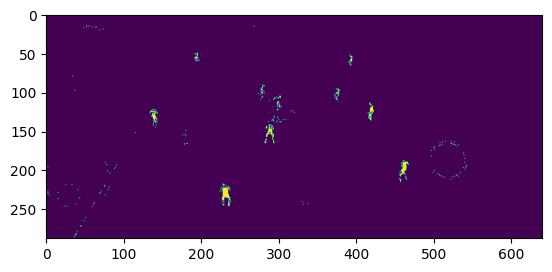

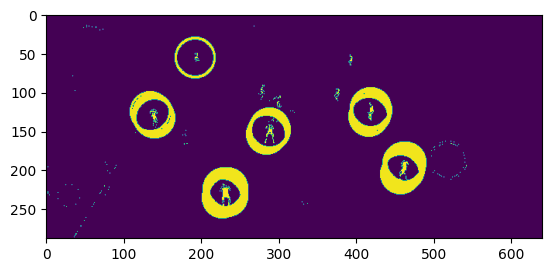

In [44]:
#yellow team
lower2 = 154,118,52
upper2 = 245,175,145

mask2 = cv2.inRange(image2,lower2,upper2)
print("Yellow team: ")
plt.imshow(mask2)
plt.show()


for i in range(mask2.shape[1]):
    for j in range(mask2.shape[0]):
        if i<mask2.shape[1]-1 and j<mask2.shape[0]-1 and mask2[j][i]==255 and mask2[j][i+1]==255 and mask2[j+1][i]==255 and mask2[j][i+2]==255 and mask2[j+2][i]==255  :    
            x=i
            y=j
            cv2.circle(mask2, (x, y), 25, (250,255,0), 2)

plt.imshow(mask2)
plt.show()


print("")


Blue team: 


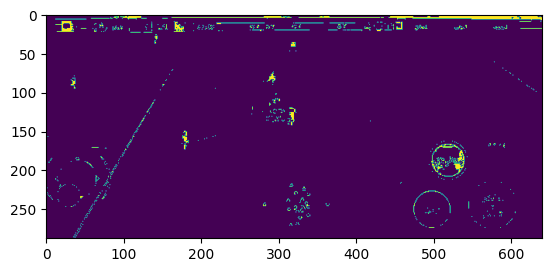

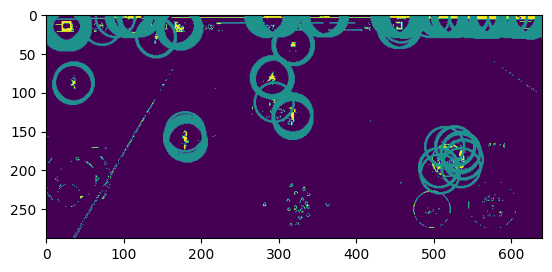

In [47]:
# Blue team
lower3 = 20,30,100
upper3 = 140,160,240

mask3 = cv2.inRange(image2,lower3,upper3)
print("Blue team: ")
plt.imshow(mask3)
plt.show()


for i in range(mask3.shape[1]):
    for j in range(mask3.shape[0]):
        if i<mask3.shape[1]-1 and j<mask3.shape[0]-1 and mask3[j][i]==255 and mask3[j][i+1]==255 and mask3[j+1][i+1]==255 and mask3[j][i-1]==255 and mask3[j-1][i]==255:    
            x=i
            y=j
            cv2.circle(mask3, (x, y), 25, (130,255,0), 2)

plt.imshow(mask3)
plt.show()

print("")

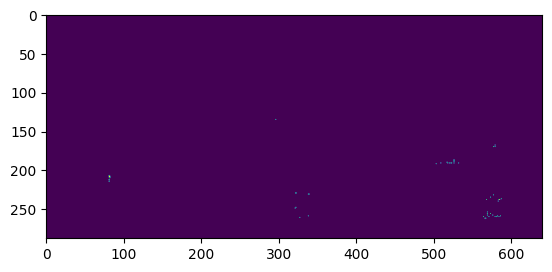

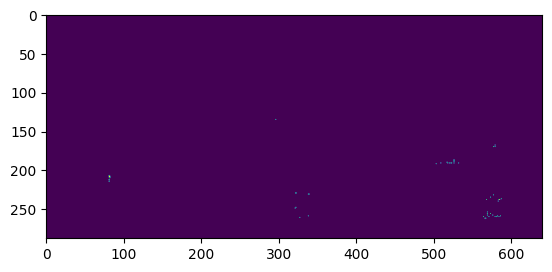

In [48]:
#show the Ball
lower4 = 145, 230, 190
upper4 = 245, 255, 220

mask4 = cv2.inRange(image2, lower4, upper4).copy()

plt.imshow(mask4)
plt.show()

for i in range(mask4.shape[1]):
    for j in range(mask4.shape[0]):
        if i<mask2.shape[1]-1 and j<mask4.shape[0]-1 and mask4[j][i]==255 and mask4[j][i+1]==255 and  280 <i < 320 and 80 < j < 120 :    
            x=i
            y=j
            cv2.circle(mask4, (x, y), 25, (65,110,110), 2)

plt.imshow(mask4)
plt.show()
print("")


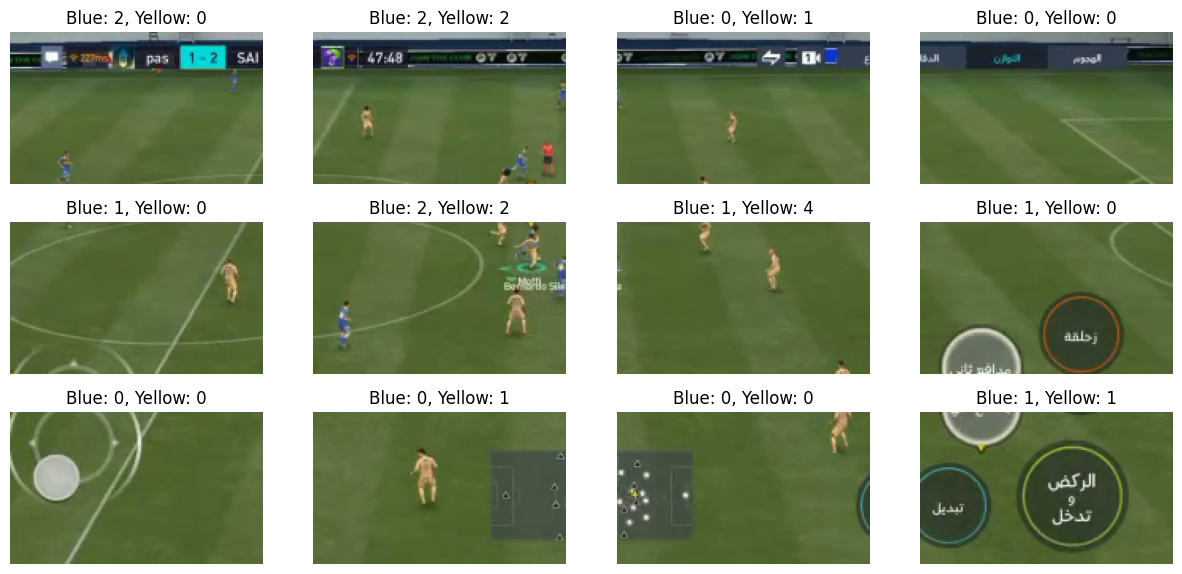

In [50]:
crops = []
width = image2.shape[1]
height = image2.shape[0]
cx = width // 4
cy = height // 3

blue_players = [(11, 149), (50, 87), (160, 36), (207, 158), (288, 84), (300, 104), (339, 133), (508, 194), (529, 178)]
yellow_players = [(184, 145), (225, 58), (247, 239), (297, 94), (320, 165), (332, 118), (422, 59), (424, 98), (461, 132), (507, 221)]

for j in range(3):
    for i in range(4):
        x = i * cx
        y = j * cy

        
        blue_count = 0
        for player in blue_players:
            if player[0] >= x and player[1] >= y and player[0] <= x + cx and player[1] <= y + cy:
                blue_count += 1

        
        yellow_count = 0
        for player in yellow_players:
            if player[0] >= x and player[1] >= y and player[0] <= x + cx and player[1] <= y + cy:
                yellow_count += 1

        crops.append({'crop': image2[y:y+cy, x:x+cx], 'blue_count': blue_count, 'yellow_count': yellow_count})

plt.figure(figsize=(15, 7))

for i in range(len(crops)):
    if i < 12:
        plt.subplot(3, 4, i+1)
        plt.imshow(crops[i]['crop'])
        plt.title(f"Blue: {crops[i]['blue_count']}, Yellow: {crops[i]['yellow_count']}")
        plt.axis('off')

plt.show()